In [7]:
from transformers import CLIPVisionModel, CLIPProcessor
from PIL import Image
import torch
from Utils import createImageDataloader

In [2]:
model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32").eval()
model.config.output_hidden_states = True
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
print("Layer Count:", model.config.num_hidden_layers)

Layer Count: 12


In [3]:
# Hook on a single Image

img = Image.open("/Users/mawy/Desktop/imgs/00000000.png").convert("RGB")
tensor = processor(images=img, return_tensors="pt").pixel_values

with torch.no_grad():
    out = model(tensor, output_hidden_states=True).hidden_states[3]
    cls1 = out[:, 0]      

In [4]:
# Using createImageDataLoader from Utils

loader = createImageDataloader(
    "/Users/mawy/Desktop/Square 512",
    model_name="openai/clip-vit-base-patch32",
    batch_size=1,
    shuffle=False,
)
batch = next(iter(loader))
cls2 = model(pixel_values = batch).hidden_states[3][:, 0] 


In [5]:
print("CLT 1 Shape:", cls1.shape)
print("CLT 2 Shape:", cls2.shape)

CLT 1 Shape: torch.Size([1, 768])
CLT 2 Shape: torch.Size([1, 768])


In [8]:
# Slightly Different Values - Why?

print("First Value for CLT 1:", cls1[0][0])
print("First Value for CLT 2:", cls2[0][0])

First Value for CLT 1: tensor(-0.0319)
First Value for CLT 2: tensor(-0.0326, grad_fn=<SelectBackward0>)


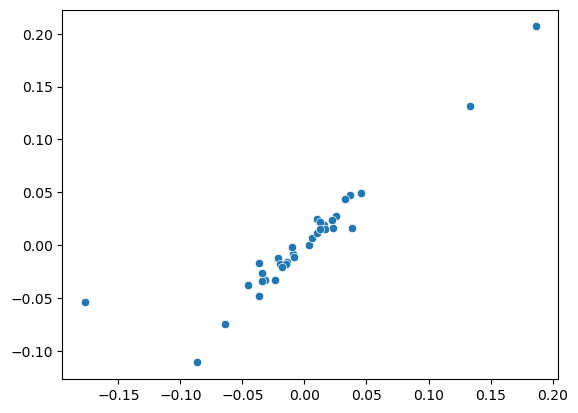

In [23]:
import seaborn as sns
sns.scatterplot(
    x=cls1[0,0:35].cpu().detach().numpy(),
    y=cls2[0,0:35].cpu().detach().numpy(),
);